# Data Visualization Notebook

## Objectives

* Answer business requirement 1:
    * The client is interested to have a study that differentiates mildewed cherry leaves vs healthy leaves.

## Inputs

* inputs/cherry_mildew_dataset/cherry-leaves/train
* inputs/cherry_mildew_dataset/cherry-leaves/test
* inputs/cherry_mildew_dataset/cherry-leaves/validation

## Outputs

* Image shape embeddings pickle file.
* Mean and variability of images per label plot.
* Plot to distinguish the contrast between powdery mildew cherry leaves and uninfected leaf images.
* Generate code that answers business requirement 1 and can be used to build an image montage on the Streamlit dashboard.

## Additional Comments

* No comment



---

# Set Data Directory

---

## Import libraries

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

## Set working directory

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-cherry-leaves-mildew-detection/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-cherry-leaves-mildew-detection'

## Set input directories

In [5]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/02%20-%20DataVisualization.ipynb

my_data_dir = os.path.abspath('inputs/cherry_mildew_dataset/cherry-leaves')
train_path = os.path.join(my_data_dir, 'train')
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

## Set output directory

In [6]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/02%20-%20DataVisualization.ipynb

version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set label names

In [8]:
# Set the labels
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['powdery_mildew', 'healthy']


***

# Data visualisation of image data

***

## Image shape

Compute average images size on train set.

In [10]:
# Initialize lists to store image dimensions
image_heights = []
image_widths = []

# Loop through train dataset
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        # Load each image
        img = imread(train_path + '/' + label + '/' + image_filename)
        
        # Get the dimensions of the image
        height, width, _ = img.shape
        
        # Append the dimensions to the respective lists
        image_heights.append(height)
        image_widths.append(width)

# Compute the average image dimensions
average_height = sum(image_heights) / len(image_heights)
average_width = sum(image_widths) / len(image_widths)

# Print the average dimensions
print(f"Average Image Height: {average_height} pixels")
print(f"Average Image Width: {average_width} pixels")


Average Image Height: 256.0 pixels
Average Image Width: 256.0 pixels


In [12]:
image_shape = (height, width, 3)
image_shape

(256, 256, 3)

Save the image shape embeddings

In [13]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

***

# Average and variability of images per label

## Function to load images in an array

In [16]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

def load_images_as_array(my_data_dir, new_size=(50, 50), n_images_per_label=20):
    X, y = [], []
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0
        label_path = os.path.join(my_data_dir, label)

        for image_filename in os.listdir(label_path):
            if counter < n_images_per_label:
                image_path = os.path.join(label_path, image_filename)

                # Load and preprocess the image
                img = image.load_img(image_path, target_size=new_size)
                img_array = image.img_to_array(img)
                img_resized = img_array / 255.0 if img_array.max() > 1 else img_array

                X.append(img_resized)
                y.append(label)
                counter += 1

    # Convert lists to NumPy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y


## Load image shapes and labels in an array

In [18]:
X, y = load_images_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print(X.shape, y.shape)

(60, 256, 256, 3) (60,)


## Plot and save mean and variability of images per label

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):
    """
    Plot and optionally save the mean and variability of images per label.
    """
    for label_to_display in np.unique(y):
        sns.set_style("white")

        label_mask = y == label_to_display
        label_images = X[label_mask]

        avg_img = np.mean(label_images, axis=0)
        std_img = np.std(label_images, axis=0)

        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap='gray')
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img, cmap='gray')

        if save_image:
            plt.savefig(f"avg_var_{label_to_display}.png", bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")


==== Label healthy ====
Image Shape: (256, 256, 3)
==== Label powdery_mildew ====
Image Shape: (256, 256, 3)


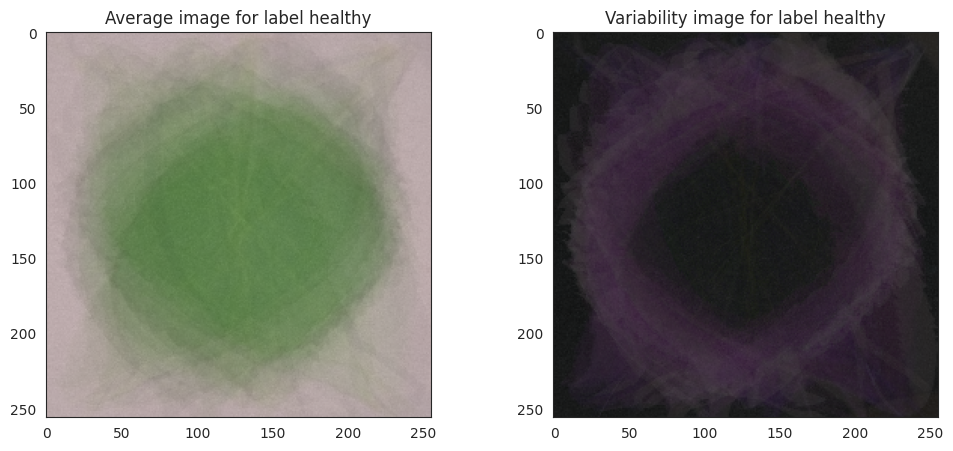

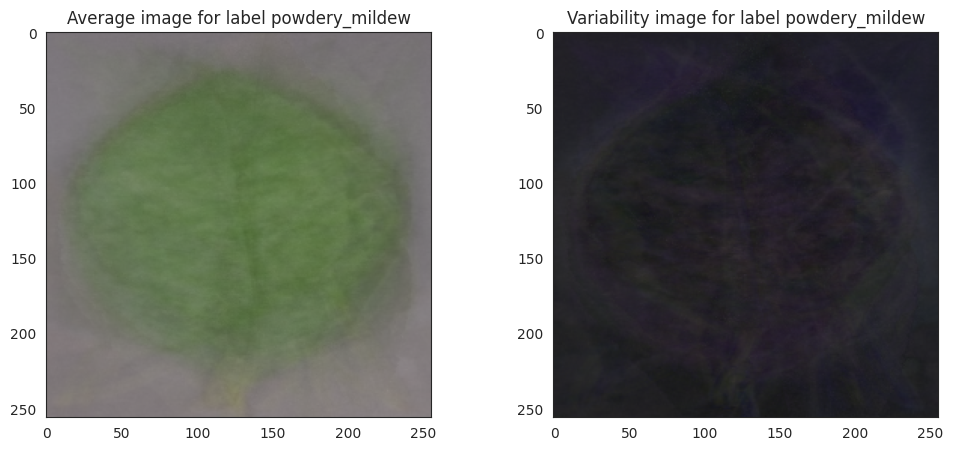

In [20]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)

***

# Difference between average mildew-contained 
# and average uninfected leaf images

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def subset_image_label(X, y, label_to_display):
    """
    Subset an array of images by label.

    Parameters:
    - X: Input array of images.
    - y: Labels corresponding to the images.
    - label_to_display: The label to subset by.

    Returns:
    - df: Subset of images with the specified label.
    """
    y = y.reshape(-1, 1, 1)
    boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
    df = X[boolean_mask]
    return df

def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20, 5), save_image=False):
    """
    Calculate the difference between average images of two labels and optionally save the result as an image.

    Parameters:
    - X: Input array of images.
    - y: Labels corresponding to the images.
    - label_1: First label for comparison.
    - label_2: Second label for comparison.
    - figsize: Tuple specifying the figure size (width, height).
    - save_image: Boolean to indicate whether to save the difference image.

    Returns:
    None
    """
    sns.set_style("white")

    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(f"Either label {label_1} or label {label_2} are not in {np.unique(y)}")
        return

    # Calculate mean from label_1
    images_label_1 = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label_1, axis=0)

    # Calculate mean from label_2
    images_label_2 = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label_2, axis=0)

    # Calculate the difference and plot the difference, average label_1, and average label_2
    difference_mean = label1_avg - label2_avg
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].imshow(label1_avg, cmap='gray')
    axes[0].set_title(f'Average {label_1}')
    axes[1].imshow(label2_avg, cmap='gray')
    axes[1].set_title(f'Average {label_2}')
    axes[2].imshow(difference_mean, cmap='gray')
    axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')

    if save_image:
        plt.savefig(f"avg_diff.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


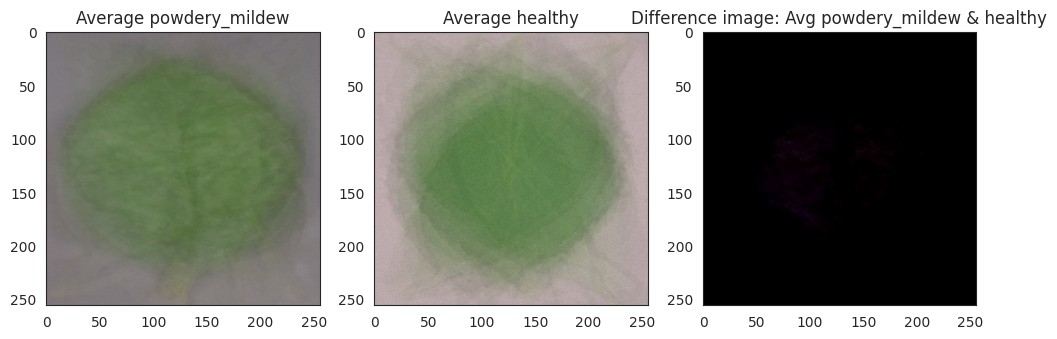

In [22]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='powdery_mildew', label_2='healthy',
                                        figsize=(12, 10),
                                        save_image=True
                                        )

## Image Montage

In [26]:
import os
import random
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def create_image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15, 10)):
    """
    Create an image montage from a directory of images.
    """

    labels = os.listdir(dir_path)

    # Check if the selected label exists
    if label_to_display in labels:

        # Check if the montage space is sufficient
        images_list = os.listdir(os.path.join(dir_path, label_to_display))
        if nrows * ncols < len(images_list):
            img_idx = random.sample(images_list, nrows * ncols)
        else:
            print(
                f"Decrease nrows or ncols to create your montage. \n"
                f"There are {len(images_list)} images in your subset. "
                f"You requested a montage with {nrows * ncols} spaces")
            return

        # Create a list of axes indices based on nrows and ncols
        list_rows = range(nrows)
        list_cols = range(ncols)
        plot_idx = list(itertools.product(list_rows, list_cols))

        # Create a Figure and display images
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        for x in range(nrows * ncols):
            img = mpimg.imread(os.path.join(dir_path, label_to_display, img_idx[x]))
            img_shape = img.shape
            axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
            axes[plot_idx[x][0], plot_idx[x][1]].set_title(
                f"Width {img_shape[1]}px x Height {img_shape[0]}px")
            axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
            axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
        plt.tight_layout()
        plt.show()

    else:
        print("The label you selected doesn't exist.")
        print(f"The existing options are: {labels}")


run montage in all labels

powdery_mildew


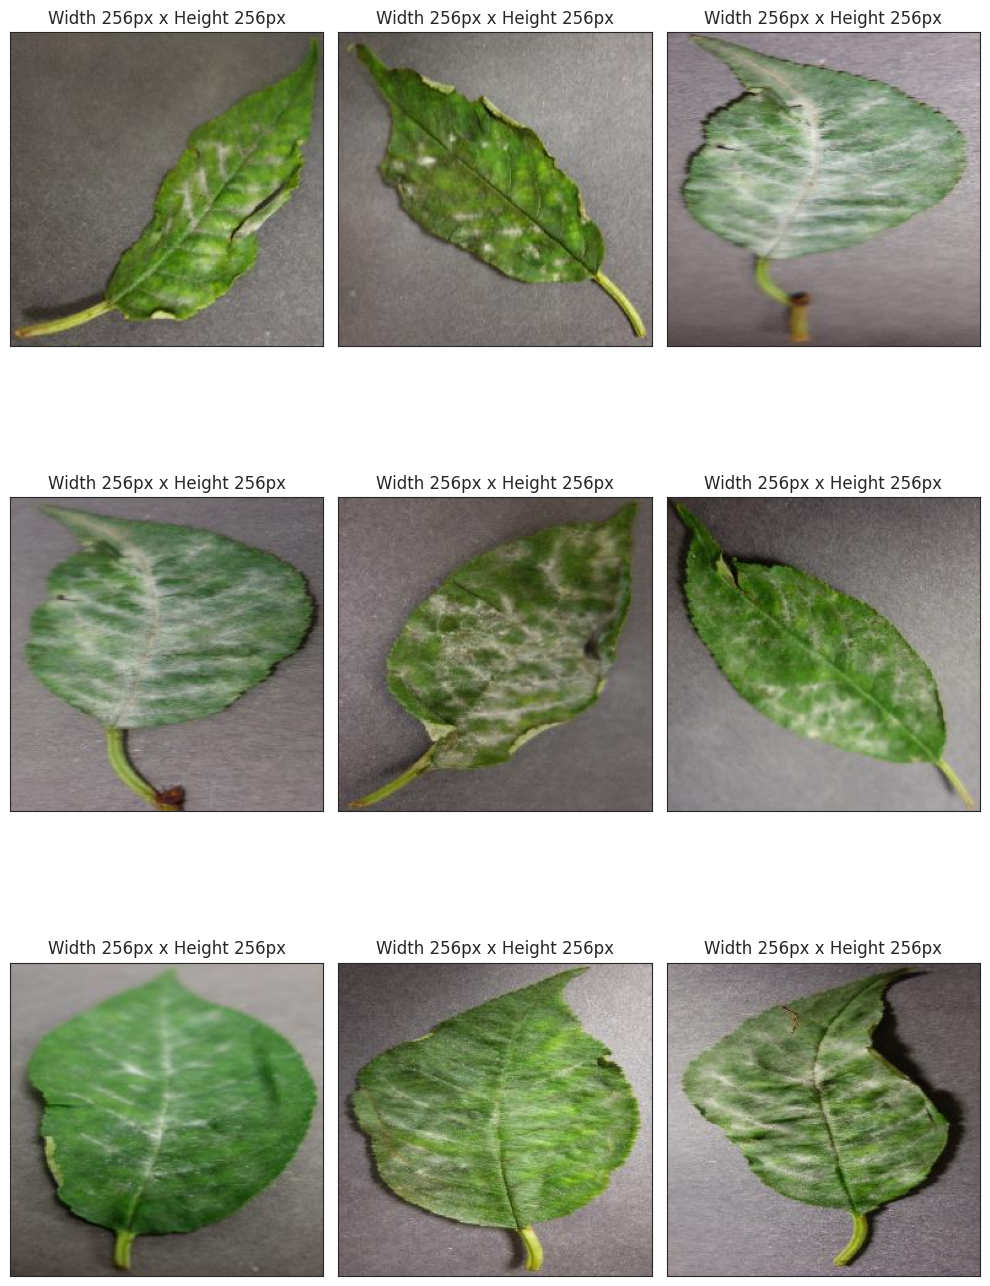



healthy


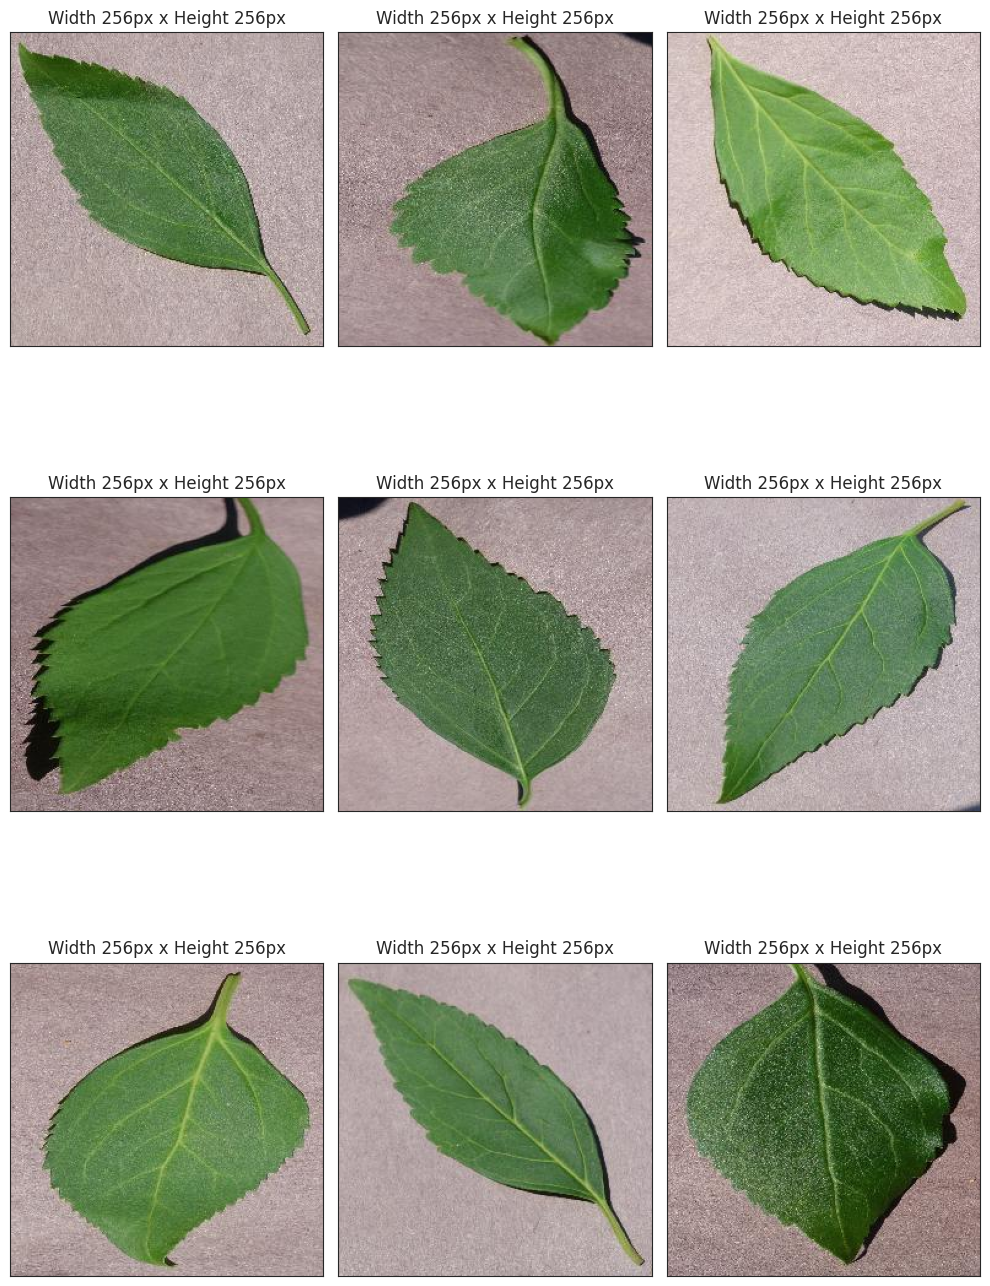

In [27]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/02%20-%20DataVisualization.ipynb

for label in labels:
    print(label)
    create_image_montage(dir_path=train_path,
                  label_to_display=label,
                  nrows=3, ncols=3,
                  figsize=(10, 15)
                  )
    print("\n")

# Conclusions and Next Steps

## Conclusions

* ### The label distribution and frequency was calculated for each dataset.

* ### The image shape embeddings were saved in a pickle file.

* ### The average image was calculated for each label and saved.

* ### An Image Montage has been created for each of the labels

 ## Next Steps

* ### Image augmentation

* ### ML model creation 

* ###

* ###